In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM  # perform F test

import selective_recruitment.globals as gl
# import Functional_Fusion.Functional_Fusion.dataset as ds 

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting the directories
behav_dir = 'A:\\data\\Cerebellum\\CerebellumWorkingMemory\\data\\fmri'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'

# Analysis of Behvioral performance inside the scanner

## Motor task

In [17]:
# # get the behavioral dataframe
df = pd.read_csv(behav_dir + "/df_fs.tsv", sep = "\t")

D_fs = pd.DataFrame()
D_fs["sn"] = df.sn
D_fs["Force"] = df["ForceB"].map({1: "L", 2: "M", 3: "H"})
D_fs["Speed"] = df["SpeedB"].map({1: "L", 2: "M", 3: "H"})
D_fs["isError"] = df["isError"]
D_fs["cond_name"] = D_fs["Force"]+"F" + "_" + D_fs["Speed"] + "S"
D_fs["PeakForce"] = df["PeakForce"].astype(float)

D_fs["isCorrect"] = 1 - D_fs["isError"] 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  0.5397 3.0000 21.0000 0.6603



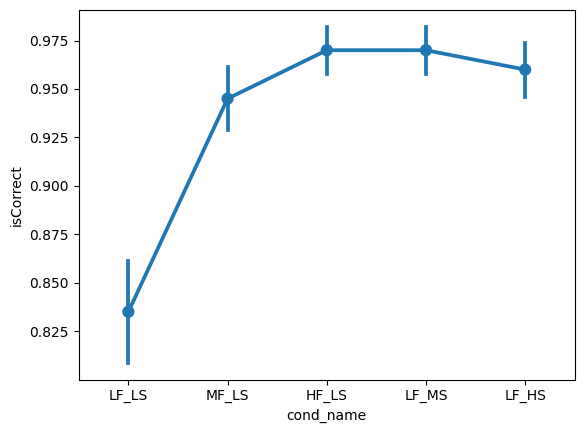

In [77]:
plotvar = "isCorrect"
cond_order = ['LF_LS', 'MF_LS', 'HF_LS', 'LF_MS', 'LF_HS']
sns.pointplot(data = D_fs, x = "cond_name", y =  plotvar, order = cond_order, errorbar="se")
plt.savefig("fs_behaviour_percent_correct.pdf")
print(AnovaRM(data=D_fs.loc[(D_fs.Force != "L")|(D_fs.Speed != "L")], depvar=plotvar,subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())


<AxesSubplot: xlabel='cond_name', ylabel='PeakForce'>

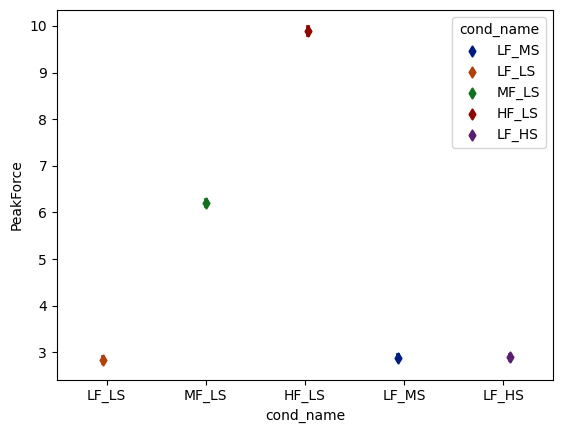

In [89]:
sns.stripplot(data = D_fs, x = "cond_name", y =  "PeakForce", 
              hue = "cond_name", order = cond_order, palette="dark", 
              dodge = True, jitter = True, alpha = 0.5)

# sns.pointplot(data = D_fs, x = "cond_name", y =  "PeakForce", 
#               hue = "cond_name", order = cond_order, palette="dark", 
#               dodge = True, markers = "d", scale = 0.75, join = False)
# sns.pointplot(
#     data=D_fs, x="cond_name", y="PeakForce", hue="Speed",
#     join=False, dodge=.8 - .8 / 3, palette="dark",
#     markers="d", scale=.75, errorbar=None
# )
# print(AnovaRM(data=D_fs.loc[D_fs.Force == "L"], depvar="PeakForce",subject='sn', within=['Speed'], aggregate_func=np.mean).fit())

## Alternative plotting
THIS IS JUST ANOTHER WAY OF VISUALIZING THE BEHAVIORAL PERFORMANCE

two separate plots one for force and one for speed, with baseline included in each

In [ ]:
# get force and speed data separately
D_fs_force = D_fs.loc[D_fs.Speed == "L"]
D_fs_speed = D_fs.loc[D_fs.Force == "L"]

#### Accuracy of Performance plot

Text(0, 0.5, 'Percent correct')

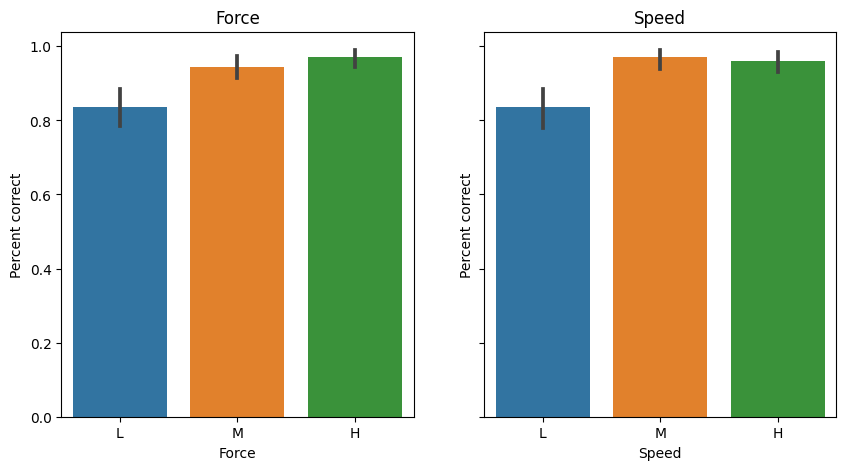

In [61]:
# create two panels for plots using subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# plot the % correct for force
sns.barplot(data = D_fs_force, x = "Force", y =  "isCorrect", order = ["L", "M", "H"], ax = axes[0])
axes[0].set_title("Force")
axes[0].set_ylabel("Percent correct")

# plot the % correct for speed
sns.barplot(data = D_fs_speed, x = "Speed", y =  "isCorrect", order = ["L", "M", "H"], ax = axes[1])
axes[1].set_title("Speed")
axes[1].set_ylabel("Percent correct")


#### Average peak force plot

Text(0, 0.5, 'Peak Force (N)')

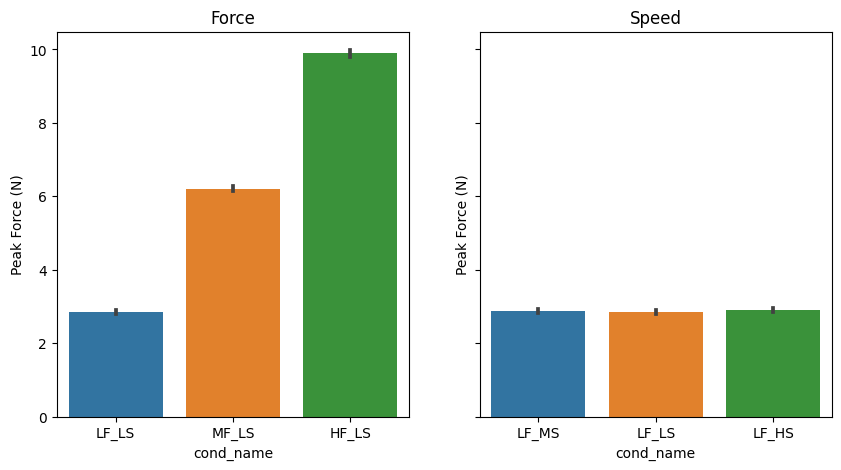

In [63]:
# create two panels for plots using subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# plot force data
sns.barplot(data = D_fs_force, x = "cond_name", y =  "PeakForce", ax = axes[0])
axes[0].set_title("Force")
axes[0].set_ylabel("Peak Force (N)")

# plot speed data
sns.barplot(data = D_fs_speed, x = "cond_name", y =  "PeakForce", ax = axes[1])
axes[1].set_title("Speed")
axes[1].set_ylabel("Peak Force (N)")


### BOLD activation vs behavioral performance

In [67]:
## get the dataframe with brain activations
parcellation = "NettekovenSym32"
cortex = "Icosahedron1002"
type = "CondHalf"

df_brain = pd.read_csv(wkdir + f'/fs_ROI_{parcellation}_{cortex}_{type}_conn_reg.tsv', sep='\t')

In [70]:
# get the activation for one selected region (within mmultiple demand network)
selected_df = df_brain.copy()
roi_name = "M3R"
plotvar = "isCorrect"
df = selected_df.loc[(selected_df.cond_name != "rest") & (selected_df.roi_name == roi_name)]
print(df.columns)

# prep behavioral dataframe
grouped = D_fs.groupby(["sn", "Force", "Speed"])
agg_kw = {
          plotvar:np.mean}
DD = grouped.agg(agg_kw)

# prep activation dataframe
grouped2 = df.groupby(["sn", "Force", "Speed"])
agg_kw = {
          'Y':np.mean,
          }
dff = grouped2.agg(agg_kw)
# make multilevel index into a new column
# dff.set_index(['load', 'recall'], inplace=True)

# Reset the multi-level index and convert it into a new column
dff.reset_index(inplace=True)
D_fs.reset_index(inplace=True)


# merge the two dataframes by load and recall
D2 = pd.merge(D_fs, dff, on = ["sn", "Force", "Speed"])

# # plot
sns.lmplot(data = D2, x = "Y", y = plotvar, hue = "load", col = "recall_dir", fit_reg = True)
# plot
sns.lmplot(data = D2, y = "Y", x = plotvar, hue= "recall_dir", col = "load", fit_reg = True, sharex=False)


# sns.scatterplot(
#     data=D2, x="isCorrectTot", y="Y", hue="load", style="recall_dir", palette="tab10"
# )

Index(['Unnamed: 0', 'half', 'cond_num', 'n_rep', 'sn', 'cond_name',
       'task_name', 'task_num', 'sess', 'phase', 'error', 'speed', 'force',
       'load', 'recall', 'reg_id', 'names', 'roi', 'roi_name', 'Y', 'X',
       'slope', 'intercept', 'R2', 'res'],
      dtype='object')


KeyError: 'Force'